In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

Implementation of the gradient bandit. 

In [9]:
def get_rewards():
    mean = np.array([-2, 1, 0, -3]) 
    return np.random.randn(4) + mean

In [10]:
def softmax(H):
    h = H - np.max(H)
    exp = np.exp(h)
    return exp / np.sum(exp)

In [11]:
def gradient_bandit(N):
    H = np.zeros(4)  
    r_hist = []
    alpha = 0.1  
    for t in range(1, N):
        policy = softmax(H) # policy pi
        # sampling (choice) action by policy
        a = np.random.choice(4, p=policy) 
        rewards = get_rewards()
        r = rewards[a] # R_t (reward for chosen action)
        r_hist.append(r)
        avg_r = np.average(r_hist)
        # update a == A_t (chosen action)
        H[a] = H[a] + alpha*(r-avg_r)*(1-policy[a])
        # update a != A_t (non-chosen action)
        H[:a] = H[:a] - alpha*(r-avg_r)*policy[:a]
        H[a+1:] = H[a+1:] - alpha*(r-avg_r)*policy[a+1:]
    
    return softmax(H), r_hist

In [20]:
opt_policy, r_hist = gradient_bandit(100)

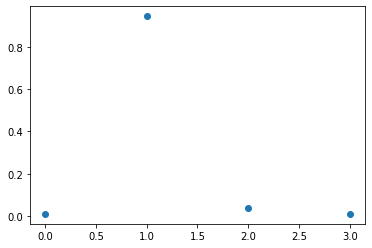

In [21]:
plt.plot(opt_policy, 'o')